# BANK PERSONAL LOAN MODELLING

Exploring the DATA:


The data set includes 5000 observations with fourteen variables divided into four different measurement categories. The binary category has five variables, including the target variable personal loan, also securities account, CD account, online banking and credit card. The interval category contains five variables: age, experience, income, CC avg and mortgage. The ordinal category includes the variables family and education. The last category is nominal with ID and Zip code. The variable ID does not add any interesting information e.g. individual association between a person (indicated by ID) and loan does not provide any general conclusion for future potential loan customers. Therefore, it will be neglected in the examination.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df = pd.read_excel("Bank_Personal_Loan_Modelling.xlsx", sheet_name='Data')

In [31]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [32]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

We have 5 binary categories. They are:
1. Personal loan: Did the customer has accepted to take person loan in the last campaign? TARGET VARIABLE
2. Securities account: Does the customer has security account with the bank?
3. CD account: Does the customer has a Certificate of Deposit(CD) account with the bank?
4. Online banking: Does the customer use internet banking?
5. credit card: Does the customer has credit card of the bank?

We have 2 categorical variables:
1. Family: no. of family members
2. Education: education level of the customer

We have internal variables. They are:
1. Age: Age of the customer
2. Experience: Years of Experience
3. Income: Annual Income in dollars
4. CCAvg: Average credit card spending
5. Mortgage: Value of House Mortage

In [29]:
df.shape

(5000, 13)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [36]:
#checking null values
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

From the above analysis, we conclude that we have a clear dataset to work on.

In [38]:
df.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [46]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


1. Age feature is normally distributed with majority of customers falling between 30 years and 60 years of age. We can confirm this by looking at the describe statement above, which shows mean is almost equal to median
2. Experience is normally distributed with more customer having experience starting from 8 years. Here the mean is equal to median. There are negative values in the Experience. This could be a data input error as in general it is not possible to measure negative years of experience. We can delete these values, because we have 3 or 4 records from the sample.
3. Income is positively skewed. Majority of the customers have income between 45K and 55K. We can confirm this by saying the mean is greater than the median
4. CCAvg is also a positively skewed variable and average spending is between 0K to 10K and majority spends less than 2.5K
5. Mortgage 70% of the individuals have a mortgage of less than 40K. However the max value is 635K
6. The variables family and education are ordinal variables. The distribution of families is evenly distributes

In [48]:
df[df['Experience']<0]['Experience'].count()

52

We have 52 negative experience columns, which we have to clean.

In [56]:
dfexp = df.loc[df['Experience']>0]
negexp = df.Experience <0
column_name = 'Experience'
mylist = df.loc[negexp]['ID'].tolist()
negexp.value_counts()

False    4948
True       52
Name: Experience, dtype: int64

The following code does the below steps:

1. For the record with the ID, get the value of Age column
2. For the record with the ID, get the value of Education column
3. Filter the records matching the above criteria from the data frame which has records with positive experience and take the median
4. Apply the median back to the location which had negative experience

In [64]:
for id in mylist:
    age = df.loc[np.where(df['ID']==id)]["Age"].tolist()[0]
    education = df.loc[np.where(df['ID']==id)]["Education"].tolist()[0]
    df_filtered = dfexp[(dfexp.Age == age) & (dfexp.Education == education)]
    exp = df_filtered['Experience'].median()
    df.loc[df.loc[np.where(df['ID']==id)].index, 'Experience'] = exp

In [66]:
# checking if there are records with negative experience
df[df['Experience'] < 0]['Experience'].count()

0

In [70]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,4971.0,20.243211,11.359189,0.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


# Exploratory Data Analysis of the Dataset:

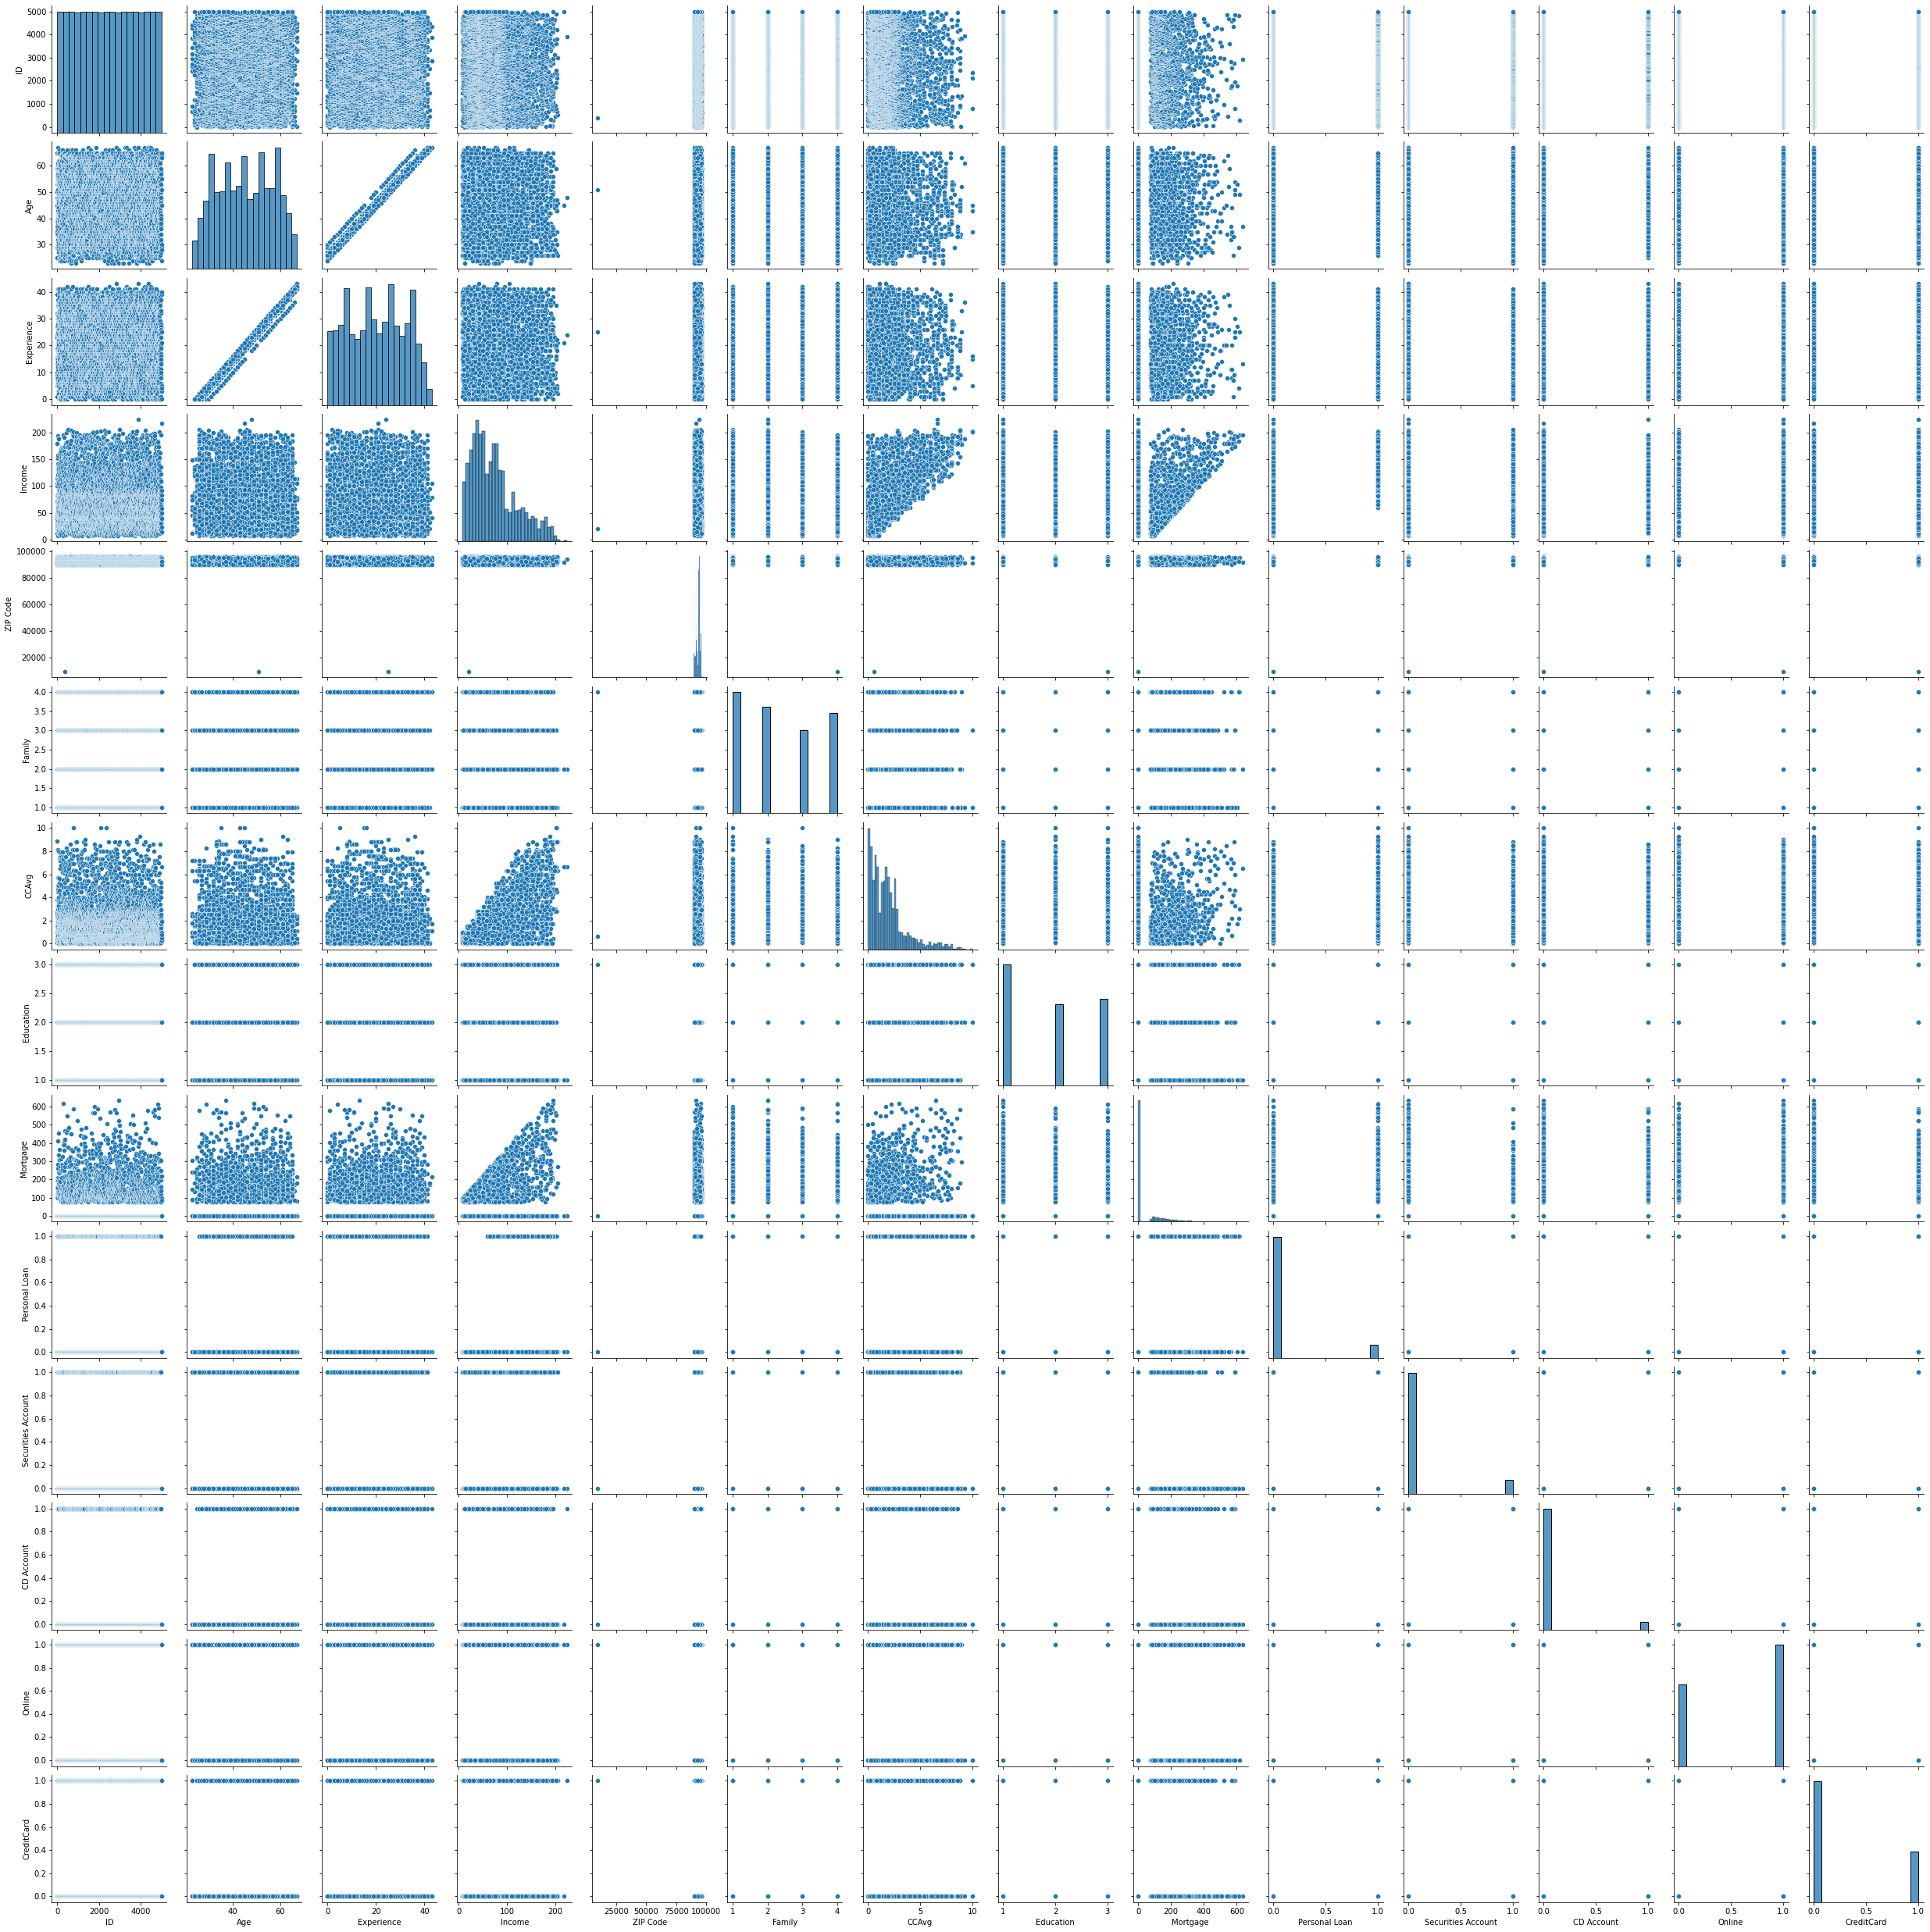

In [72]:
#using pairplot
sns.pairplot(df)

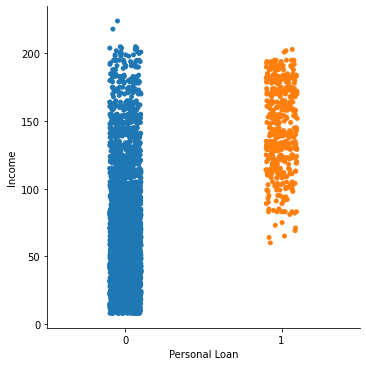

In [81]:
#using catplot
sns.catplot(x="Personal Loan", y="Income", data=df)

From the above catplot, we can clearly make an observation that after Rs. 50000/- of income, people are opting for personal loan.

Influence of income and Education on Personal Loan:

<AxesSubplot:xlabel='Education', ylabel='Income'>

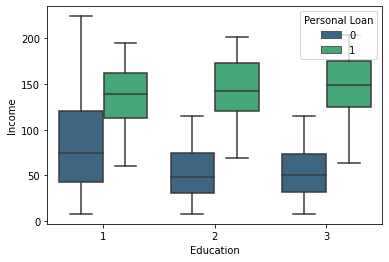

In [95]:
sns.boxplot(x='Education', y = 'Income', hue = 'Personal Loan', data =df, palette = 'viridis' )

**Observation** : It seems the customers whose education level is 1 is having more income. However customers who has taken the personal loan have the same income levels.

<AxesSubplot:xlabel='Education', ylabel='Mortgage'>

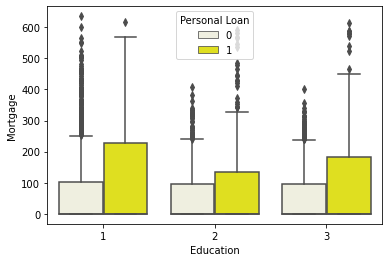

In [88]:
sns.boxplot(x="Education", y='Mortgage', hue="Personal Loan", data=df,color='yellow')

Inference : From the above chart it seems that customer who do not have personal loan and customer who has personal loan have high mortgage

<AxesSubplot:xlabel='Securities Account', ylabel='count'>

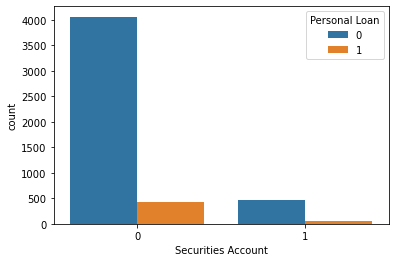

In [96]:
sns.countplot(x='Securities Account', data = df, hue = 'Personal Loan')

**Inference**:
We can clearly see that those who don't have securities account have taken personal loan as compared to those who have securities account.

<AxesSubplot:xlabel='Family', ylabel='count'>

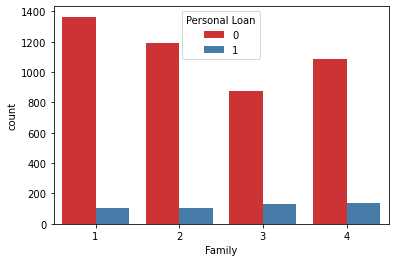

In [99]:
sns.countplot(x='Family',data=df,hue='Personal Loan',palette='Set1')


**Inference**:
As we can clearly familysize doesn't have any impact(check the blue bar), but yes familysize with 3 or 4 people can be a suitable target for our future campaign reference.

<AxesSubplot:xlabel='CD Account', ylabel='count'>

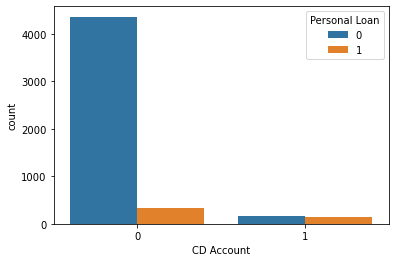

In [103]:
sns.countplot(x='CD Account',data=df,hue='Personal Loan')

**Inference**: From the above graph, we can clearly see that almost all the customers who have CD Account have taken personal loans from the bank.

<AxesSubplot:xlabel='CreditCard', ylabel='count'>

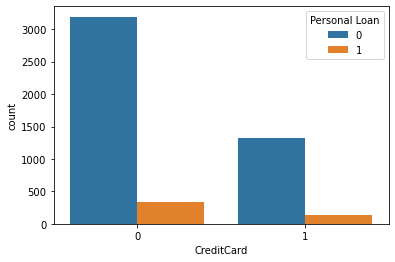

In [121]:
sns.countplot(x='CreditCard',data=df,hue='Personal Loan')

**Inference**:
We can clearly see that the customers who don't have a credit card will have a personal loan by his/her name.

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CCAvg', ylabel='Density'>

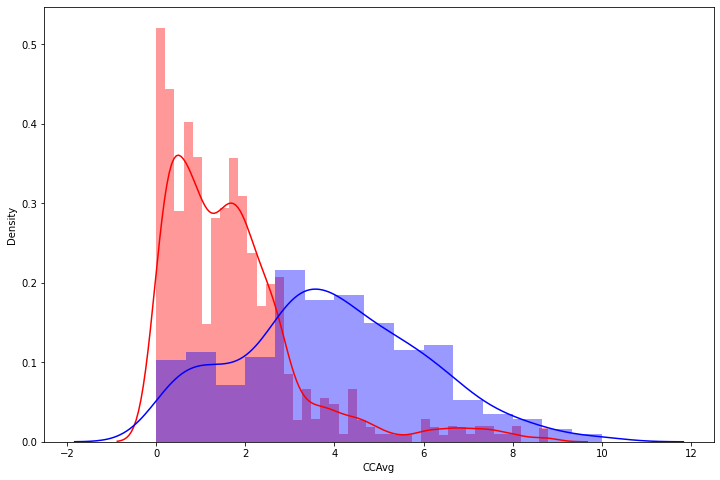

In [114]:
fig, ax = plt.subplots(figsize=(12,8))
sns.distplot(df[df['Personal Loan'] == 0]['CCAvg'], color = 'r', ax=ax)
sns.distplot(df[df['Personal Loan'] == 1]['CCAvg'], color = 'b', ax=ax)

In [119]:
print('Credit card spending of Non-Loan customers: ',df[df['Personal Loan'] == 0]['CCAvg'].median()*1000)
print('Credit card spending of Loan customers    : ', df[df['Personal Loan'] == 1]['CCAvg'].median()*1000)

Credit card spending of Non-Loan customers:  1400.0
Credit card spending of Loan customers    :  3800.0


Observation: 
1. The graph show persons who have personal loan have a higher credit card average. Average credit card spending with a median of 3800 dollar indicates a higher probability of personal loan.
2. Lower credit card spending with a median of 1400 dollars is less likely to take a loan. 
This could be a useful information.

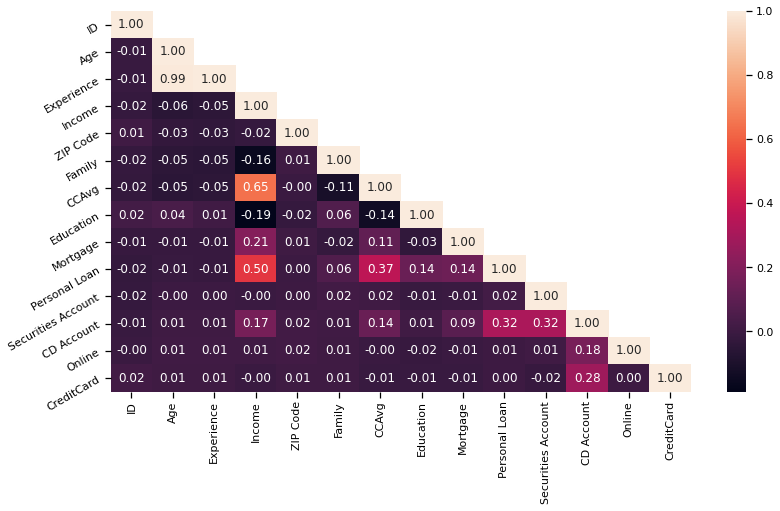

In [128]:
#Checking correlation of independent variables:
corr = df.corr()
sns.set_context('notebook', font_scale=1.0, rc= {"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
# create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

From the above correlation, we can clearly conclude that:
1. CCAvg is moderately correlated with Income.
2. Age and Experience is highly correlated.

<AxesSubplot:xlabel='Family', ylabel='Income'>

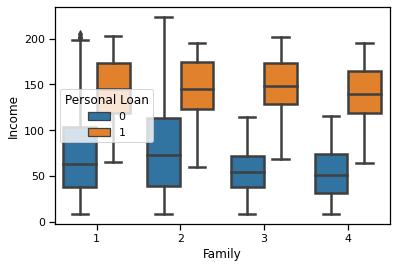

In [131]:
sns.boxplot(x=df.Family,y=df.Income,hue=df['Personal Loan'])

**Inference**:
Looking at the above plot, families with income less than 100K are less likely to take loan,than families with high income

# Summary of the whole Exploratory Data Analysis:

1. Customers are applying and taking loans who have their incomes above Rs.50000/- approximately.
2. It seems the customers whose education level is 1 is having more income. However customers who has taken the personal loan      have the same income levels.
3. Customers who are personal loans have high mortgage.
4. Customers who don't have securities account have taken personal loan as compared to those who have securities account.
5. Familysize doesn't have any impact, but familysize with 3 or 4 people can be a suitable target for our future campaign          reference.
6. Almost all the customers who have CD Account have taken personal loans from the bank.
7. Customers who don't have a credit card will have a personal loan by his/her name.
8. Customers who have personal loan have a higher credit card average. Average credit card spending with a median of 3800          dollar indicates a higher probability of personal loan.
9. Lower credit card spending with a median of 1400 dollars is less likely to take a loan. This could be a useful information.
10. Families with income less than 100K are less likely to take loan,than families with high income



# Creating models:

In [3]:
#splitting our data into train set and test set:

from sklearn.model_selection import train_test_split

In [7]:
X = df.drop(['ID', 'Experience', 'Personal Loan'], axis=1)

In [8]:
y= df['Personal Loan']

In [14]:
train_set, test_set = train_test_split(df.drop(['ID','Experience'], axis=1), test_size=0.3 , random_state=100)

In [18]:
train_labels = train_set.pop('Personal Loan')
test_labels = test_set.pop('Personal Loan')

# Applying Decision Tree Classifier:

In [38]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [23]:
model=DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(train_set, train_labels)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [24]:
model.score(test_set, test_labels)

0.9773333333333334

In [28]:
y_predict = model.predict(test_set)
y_predict[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [29]:
test_set.head(5)

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
789,29,31,92126,4,0.3,2,0,0,0,1,0
2507,59,60,90048,4,2.1,1,234,0,0,1,1
2376,58,23,91768,3,0.2,1,0,0,0,0,0
1378,54,34,93305,4,0.1,3,0,0,0,1,0
598,56,11,92374,2,0.2,3,90,0,0,0,0


# Naive Bayes

In [30]:
naive_model = GaussianNB()
naive_model.fit(train_set, train_labels)

prediction = naive_model.predict(test_set)
naive_model.score(test_set,test_labels)

0.8866666666666667

# Random Forest classifier

In [31]:
randomforest_model = RandomForestClassifier(max_depth=2, random_state=0)
randomforest_model.fit(train_set, train_labels)

RandomForestClassifier(max_depth=2, random_state=0)

<AxesSubplot:>

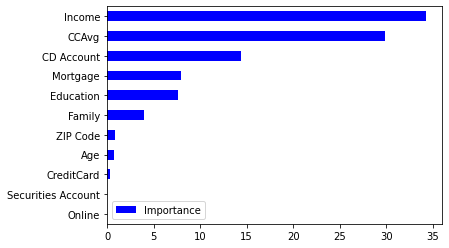

In [33]:
Importance = pd.DataFrame({'Importance':randomforest_model.feature_importances_*100}, index=train_set.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='b', )

**Inference**:
1. We can easily see that Income is highly important if a person would like to take a personal loan in the next campaign.
2. Credit card avergae spent comes in the second.

In [35]:
predicted_random=randomforest_model.predict(test_set)
randomforest_model.score(test_set,test_labels)

0.904

# KNN ( K - Nearest Neighbour )

In [37]:
train_set_indep = df.drop(['Experience' ,'ID'] , axis = 1).drop(labels= "Personal Loan" , axis = 1)
train_set_dep = df["Personal Loan"]
X = np.array(train_set_indep)
Y = np.array(train_set_dep)
X_Train = X[ :3500, :]
X_Test = X[3501: , :]
Y_Train = Y[:3500, ]
Y_Test = Y[3501:, ]

In [39]:
knn = KNeighborsClassifier(n_neighbors= 21 , weights = 'uniform', metric='euclidean')
knn.fit(X_Train, Y_Train)    
predicted = knn.predict(X_Test)
from sklearn.metrics import accuracy_score
acc = accuracy_score(Y_Test, predicted)
print(acc)

0.9106070713809206


# MODEL COMPARISION:

In [44]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [42]:
X=df.drop(['Personal Loan','Experience','ID'],axis=1)
y=df.pop('Personal Loan')

C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


KNN: 0.898600 (0.008902)
DTC: 0.981800 (0.004238)
NB: 0.885600 (0.010385)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(



RF: 0.986200 (0.003280)


C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


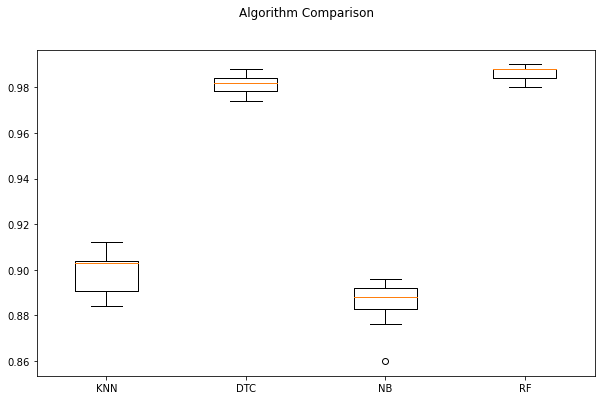

In [49]:
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = KFold(n_splits=10, random_state=12345)
	cv_results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure(figsize=(10,6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Conclusion
The aim of the bank is to convert their liability customers into loan customers. They want to set up a new marketing campaign; hence, they need information about the connection between the variables given in the data. Four classification algorithms were used in this study. From the above graph , it seems like Decision Tree algorithm have the highest accuracy and we can choose that as our final model

# Thank you!